# SIXT33N Project
## Phase 2: Controls

### EE 16B: Designing Information Devices and Systems II, Spring 2016

Written by Nathaniel Mailoa and Emily Naviasky (2016)

nmailoa@berkeley.edu &emsp; enaviasky@berkeley.edu

**Name 1**:

**Login**: ee16b-


**Name 2**:

**Login**: ee16b-

## Table of Contents

* [Introduction](#intro)
* [Part 1: The SIXT33N Car](#part1)
* [Part 2: Sensors and Actuators](#part2)
* [Part 3: Open Loop System Modeling](#part3)
* [Part 4: Closed Loop Simulation and Implementation](#part4)
* [Part 5: Implementing Turns](#part5)

<a id='intro'></a>
## Introduction

In this phase you will first build SIXT33N's chassis and the sensors (wheel encoders) and actuators (motor drivers). You will also power the car up using a 9V rechargeable battery. Next, you will model the the car as an open loop system. You will gather some dynamics data to figure out the variables in your model, and lastly build a closed loop controller. By the end of the phase, you should be able to control the trajectory of the car, which will be integrated with the other components of the project in the last phase. As a reminder, your car has to be able to turn and go straight at different speeds. If you want to implement more complicated controls, go for it!

The goals of this phase are as follows:
- Motor driver circuit
- System modelling
- Controller design
- Closed loop simulation
- Move at constant speed + direction

As mentioned in the main project page, there is a checkpoint every week. Each checkpoint is worth 5 points, and if you are late you are awarded 4 points. The checkpoints are due in the beginning of the lab in the week after. For this phase, the checkpoints (marked **<span style="color:green">green</span>** in the Notebook) are:
- Week 1: Open loop parameters, derivation of eigenvalue, talk about how to turn
- Week 2: Car running straight and turning

<a id='part1'></a>
## <span style="color:blue">Part 1: The SIXT33N Car</span>

### Materials
- Chassis kit
- 2 wheel encoder modules

Build the SIXT33N car from the kit. The instructions can be found in `SIXT33N_Car_Instructions.ipynb`.

<a id='part2'></a>
## <span style="color:blue">Part 2: Sensors and Actuators</span>

### Materials
- Part 1 setup
- 2 C2690A NPN BJTs (Bipolar Junction Transistor)
- 2 IN4001 Diodes
- 2 2k$\Omega$ resistors
- Switch
- 2 9V rechargeable batteries + battery leads (knotted)
- 1 LM34015 voltage regulator
- 2 $1\mu F$ capacitors
- 2 $10\mu F$ capacitors

As two of your group members are working on the front end and PCA integration, you will need another breadboard to connect the motor and photointerrupter to your Launchpad. Note that everything you build in this breadboard will have to be moved to the main circuit breadboard. They have been told to leave a third of the breadboard for the circuits in this phase. Just as you did on the main breadboard, <b>use one power rail for 3.3V and the other for 5V power supply</b>.

Please be sure to put a knot in your battery leads. Tie the red and black wires in a simple square knot as shown below. This will drastically decrease the chance that the leads will accidentlly short and kill your battery. We don't want any dead batteries.

<img width='400px' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/proj-batt-lead.jpg">

## Battery and Voltage Regulator

You probably do not want to try to power SIXT33N off your laptop and run around with a long cord chasing it. Thus, <b>you will run the car off of two 9V batteries</b>. You will use one of the batteries exclusively for the motors, and the other for powering the Launchpad and microphone front end. The reason for this is that the motors consume a lot of current, but the current is not constant, in fact, it is very noisy. If we were to use the same voltage source for the Launchpad and the motors, the Launchpad would restart everytime the motors pulled too much current. Note that the ground is still all connected (i.e. the grounds of the two batteries are connected). The whole power distribution is shown in the diagram below. The front end circuit will use both the regulator output and the Launchpad's 3.3V pin.
<br/><br/>

<center>
<img width='550px' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/proj-power.png">
</center>

The Launchpad and the front end circuit needs a 5V source so you need to add a voltage regulator circuit. The <a href="http://www.ti.com/lit/ds/symlink/lm340-n.pdf">LM34015</a> is a voltage regulator that outputs around 5V. Glance through the datasheet (figure 6) to find the pin diagram. <b>First, connect the input $V_{in}$ to 9V from the bench power source</b>. Don't forget to connect the ground of the regulator to the rail you want to be ground. Add 2 $10 \mu F$ capacitors as in the schematic below. These will help decrease noise even further.

<center>
<img width='250px' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/proj-vol-reg.jpg">
</center>

**<span style="color:red">Use your multimeter to check that the output of your regulator is 5V.</span>**

Now we want to use a 9V battery instead of the bench power source. To make it easier and safer to turn the battery on and off, we will add a switch. First, take the power supply off the voltage regulator. <b>Never connect both the power source and the battery at the same time. Don't do it.</b> Use the middle pin of the switch and one of the edge pins to connect the 9V battery lead to the voltage regulator input. The opposite edge pin should remain unconnected. The ground of the 9V battery lead should go to the ground rail of the circuit. Also, remember, that your battery leads should have a knot in them if you haven't done that already.

**<span style="color:red">Use your multimeter again to check that the output of your regulator is still 5V and nothing was shorted.</span>**

Note that <b>if you are testing things at the bench, use the benchtop power supply</b>. The battery does not contain a lot of energy and the motors take a lot of power. If you leave it running it will only last a little over an hour. If the voltage of the battery drops below 7.8V, ask for a new one from your GSI.

You will power the Launchpad through its 5V pin. Don't forget to connect the Launchpad ground to the ground rail as well.

## Motor Drivers
To be able to move, the car needs motor drivers. The DC motors we use are usually driven by a Pulse Width Modulated (PWM) signal which will be produced by the Launchpad. A PWM signal is simply a square wave at a certain frequency but with variable duty cycle (percentage time the signal is high in a period). Since the motors need a lot of power, as mentioned before, we will connect the motors to their own separate 9V battery and use an NPN transistor control whether the motor is powered or not.

The NPN BJT behaves a little different from the NMOS you are familiar with. Both transistors can still be considered switch-like. An NMOS uses voltage to control whether the switch is off or on, but a BJT uses current to control the switch. When the Launchpad outputs a 0V, there is no current flowing into the base (BJT equvalent of gate) so the BJT does not allow current to flow through the motor. When the Launchpad outputs a logical high (3.3V), current is allowed to flow through the base and turn the motor on. However, BJTs can be burned by running too much current through them, so a $2K\Omega$ resistor is used to limit the current. 

<center>
<img width='220px' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/proj-motor-driver.png">
</center>

A diode is a component that only conducts current one way. If the voltage in the anode is higher than the cathode (see diagram below), it will conduct current from the anode to the cathode and behave somewhat like a closed switch. However, if the voltage in the anode is lower than the cathode, it does not conduct current and behaves like an open switch. This diode is needed because of the inductive behavior of the motor. If we do not add this diode, we risk harming the BJT. The diagram for the diode is shown below. Note that the diode has a direction - be careful which terminal is attached to the 9V power supply.

<center>
<img width='200px' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/proj-diode.png">
</center>

<b>Construct the circuit above for both wheels using the <a href="https://www.fairchildsemi.com/datasheets/KS/KSC2690A.pdf">C2690A</a> NPN BJT on the breadboard</b>. The pin diagram of the BJT is reproduced below; note that the diagram has the markings in the black plastic part facing up. Be careful when you connect the BJT and double check which terminal is which since it is easy to damage if you hook it up incorrectly. 

<center>
<img width='200px' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/proj-bjt.png">
</center>


The motor is reversible so connect it any way for now. If it turns out to go backwards later, just reverse the two terminals of the motor. To test your circuit, connect the node of the resistor labeled `MSP430 output pin` in the schematic to the function generator and set the function generator to output a <b>1kHz square wave at 3Vpp with 1.65V offset</b>. If you change the duty cycle, you should be able to control the speed of the wheels. Remember to set the output of the function generator to high impedance through Utility > Output Setup.

**<span style="color:red">Make sure that both motors drive as expected. They might not go at the same speed - our control loop will fix that.</span>**

Once the motor circuit is verified, <b>leave the resistor terminals that are supposed to be driven by the Launchpad pins connected to ground for now</b> so the motors are off - we will connect it to the Launchpad later.

## Wheel Encoders

Connect 3 female-male jumper wires to each photointerrupter module. Connect the 'G' (ground) pin to the ground of your breadboard and the 'V' (voltage) pin to the 3.3V power rail of the breadboard. Then connect the 'S' (signal) pin to a separate row in the breadboard. Connect a $1\mu F$ capacitor from this row to ground. Do this for both photointerrupters. We will connect this row to the Launchpad later.

<a id='part3'></a>
## <span style="color:blue">Part 3: Open Loop System Modeling</span>

### Materials
- Part 2 setup
- Launchpad + USB cable

Before trying to control SIXT33N, you will first characterize the open loop reponse of the system. To make modeling easier, you will separate the two wheels' model. The model that you will use for both wheels can be identical because they are symmetric. You will use the open loop model you have seen many times in lecture and homework where the state is defined as the distance the wheel has travelled since reset $d[k]$ and the velocity of the wheel $v[k]$. The open loop model has a scalar input $u[k]$ which for this application is the force on the wheels. The models also has outputs which are the distance and the velocity (thus the $C$ matrix is just the identity matrix).

$$\begin{bmatrix} d[k+1] \\ v[k+1] \end{bmatrix} = A \begin{bmatrix} d[k] \\ v[k] \end{bmatrix} + B u[k]$$

$$A = \begin{bmatrix} 1 & T_s \\ 0 & 1 \end{bmatrix} \qquad B = \begin{bmatrix} b_1 \\ b_2 \end{bmatrix}$$


All distances are measured in cm (each encoder tick corresponds to 1cm of wheel travel) while time is measured in ms. As you can see, there are 2 unknown variables, namely $b_1$ and $b_2$. To determine these parameters, we will perform least squares regression on each row. You will do this for both wheels separately.

<b>Your car wheels are going to move in this step. Make sure that the car is suspended above the desk. Don't let your car jump off the bench.</b>

First, you will connect the car to your Launchpad. <b>Remove the connection from the input to the motor driver circuit to ground</b>, then connect the Launchpad pins that control the motors and encoders. The encoder pins should be connected to the row in your breadboard that is connected to the 'S' pin of the photointerrupters.

 - LEFT_MOTOR P2_0
 - LEFT_ENCODER P2_5
 - RIGHT_MOTOR P1_5
 - RIGHT_ENCODER P1_2
 
Now, you will collect the data by uploading the sketch <b>`dynamics_data.ino`</b>. Glance through the sketch$-$ it records the position and the average time between encoder ticks (i.e. 1/velocity) of each wheel while slightly varying the input signal $u[k]$. In case you were wondering, the sampling period is $T_s = 200$ms. 

Power the Launchpad from the battery and voltage regulator using the 5V pin. Make sure you put the 5V jumper back in place if you took it off. Place the car on the ground in a large empty space and hit the reset button. There is a brief period of time after you hit reset where the car will not move, that is so you have time to place it on the ground. Once the car starts moving it is collecting data. If the car hits a wall, you should restart and try collecting the data again. You can gently nudge the car to keep it away from walls, but the more you touch it during data collection, the worse the data will be. The car will collect data for 30 seconds and then stop moving. <b>Do not turn the Launchpad off at this point. Do not restart. You will lose all the data you just collected.</b> Bring the car to your PC and connect the Launchpad to your PC using a USB cable,<b> again, without turning the Launchpad off</b>. Open Serial Monitor in Energia and set the baud rate to 38400 in the lower right corner of the window - you will see a lot of data printed. Uncheck Autoscroll so that you can actually look at the data. Copy all the numbers between two "Start" lines (100 lines total) to a text file called <b>`data.txt`</b>. This data will be used in the Python code below.

Now that we have some data, we can try performing least square regression. <span style="color:red"><b>Formulate the least squares problem for each row of the matrix equation above on a piece of paper and code it up in the cells below.</b></span> Unfortunately, `np.linalg.lstsq` does not work if you only have 1 column in the `A` matrix, so you will have to compute the solution manually (recall that the solution to $Ax=b$ is $x=(A^TA)^{-1}A^Tb$). The functions `.T` and `np.linalg.inv` will be helpful here. 

<span style="color:red"><b>Execute the code blocks below for the left wheel first (SKIP THE 5th CELL) and record the values of $b_1$ and $b_2$ in the variables `b1_left` and `b2_left` (after plotting). Then re-execute the code blocks for the right wheel (SKIP THE 4th CELL INSTEAD) and record the $b_1$ and $b_2$ values in the variables `b1_right` and `b2_right`.</b></span>

In [126]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
DATA_LEN = 100
data = np.zeros((DATA_LEN,5))
f = open('data.txt', 'r')
for i,line in enumerate(f.readlines()):
    data[i,:] = str.split(line, ',')
f.close()

In [128]:
# Load the data
Ts = 200
u_k = np.matrix(data[1:,0] - data[:DATA_LEN-1,0]).T

d_k_left = np.matrix(data[:DATA_LEN-1,1]).T     # d[k]
d_k1_left = np.matrix(data[1:,1]).T             # d[k+1]
v_k_left = np.matrix(1/data[:DATA_LEN-1,2]).T   # v[k]
v_k1_left = np.matrix(1/data[1:,2]).T           # v[k+1]

d_k_right = np.matrix(data[:DATA_LEN-1,3]).T
d_k1_right = np.matrix(data[1:,3]).T
v_k_right = np.matrix(1/data[:DATA_LEN-1,4]).T
v_k1_right = np.matrix(1/data[1:,4]).T

In [129]:
# Use this block to find the left wheel parameters
d_k = d_k_left
d_k1 = d_k1_left
v_k = v_k_left
v_k1 = v_k1_left

In [130]:
# YOUR CODE HERE #
A = u_k
b = d_k1 - d_k - Ts *v_k
b1 = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(b)[0,0]
print('b1 = ' + str(b1))

b1 = 12.1743655248


In [131]:
# YOUR CODE HERE #
A = u_k
b = v_k1 - v_k
b2 = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(b)[0,0]
print('b2 = ' + str(b2))

b2 = 0.0596450663552


To see how good the model is, try simulating the open loop model. The cells below takes the initial distance and velocity and plots the distance and velocity the model predicts. The result should be pretty bad compared to the actual data, but it's good enough to model the system - the feedback loop will (magically) take care of it!

In [132]:
# Simulate velocity and distance with open loop model
sim = np.zeros((2, DATA_LEN))
sim[0,0] = d_k1[0]
sim[1,0] = v_k1[0]

# Open loop update matrices
A = np.matrix([[1, Ts], [0, 1]])
B = np.matrix([[b1], [b2]])

for i in range(1, DATA_LEN):
    sim[:,i] = (np.dot(A, np.matrix(sim[:,i-1]).T) + np.dot(B, np.matrix(u_k[i-1]).T)).T

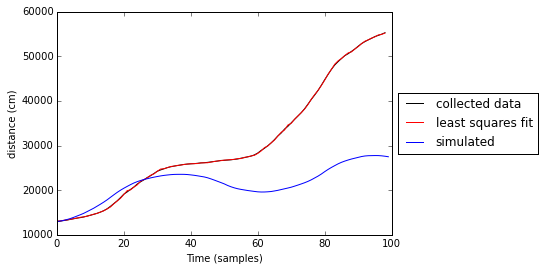

In [133]:
plt.plot(d_k1, 'black')
plt.plot(d_k + Ts*v_k + b1*u_k, 'red')
plt.plot(sim[0,:], 'blue')
plt.xlabel('Time (samples)')
plt.ylabel('distance (cm)')
plt.legend(['collected data', 'least squares fit', 'simulated'], loc='center left', bbox_to_anchor=(1, 0.5))

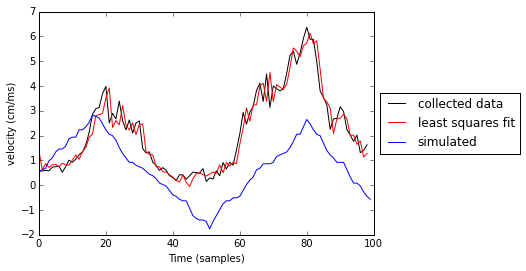

In [134]:
plt.plot(v_k1, 'black')
plt.plot(v_k + b2*u_k, 'red')
plt.plot(sim[1,:], 'blue')
plt.xlabel('Time (samples)')
plt.ylabel('velocity (cm/ms)')
plt.legend(['collected data', 'least squares fit', 'simulated'], loc='center left', bbox_to_anchor=(1, 0.5))

In [116]:
b1_left = b1
b2_left = b2

In [135]:
# Use this block to find the right wheel parameters
d_k = d_k_right
d_k1 = d_k1_right
v_k = v_k_right
v_k1 = v_k1_right

In [136]:
# YOUR CODE HERE #
A = u_k
b = d_k1 - d_k - Ts *v_k
b1 = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(b)[0,0]
print('b1 = ' + str(b1))

b1 = 0.525910281574


In [137]:
# YOUR CODE HERE #
A = u_k
b = v_k1 - v_k
b2 = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(b)[0,0]
print('b2 = ' + str(b2))

b2 = 0.00217319746973


In [138]:
# Simulate velocity and distance with open loop model
sim = np.zeros((2, DATA_LEN))
sim[0,0] = d_k1[0]
sim[1,0] = v_k1[0]

# Open loop update matrices
A = np.matrix([[1, Ts], [0, 1]])
B = np.matrix([[b1], [b2]])

for i in range(1, DATA_LEN):
    sim[:,i] = (np.dot(A, np.matrix(sim[:,i-1]).T) + np.dot(B, np.matrix(u_k[i-1]).T)).T

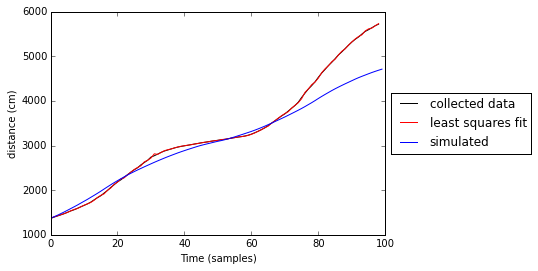

In [141]:
plt.plot(d_k1, 'black')
plt.plot(d_k + Ts*v_k + b1*u_k, 'red')
plt.plot(sim[0,:], 'blue')
plt.xlabel('Time (samples)')
plt.ylabel('distance (cm)')
plt.legend(['collected data', 'least squares fit', 'simulated'], loc='center left', bbox_to_anchor=(1, 0.5))

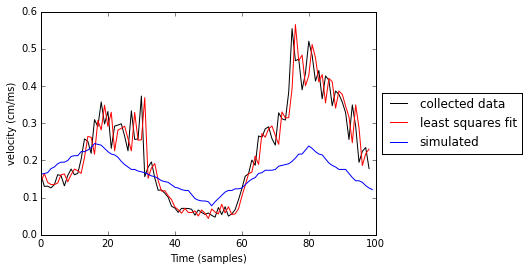

In [142]:
plt.plot(v_k1, 'black')
plt.plot(v_k + b2*u_k, 'red')
plt.plot(sim[1,:], 'blue')
plt.xlabel('Time (samples)')
plt.ylabel('velocity (cm/ms)')
plt.legend(['collected data', 'least squares fit', 'simulated'], loc='center left', bbox_to_anchor=(1, 0.5))

In [143]:
b1_right = b1
b2_right = b2

Before we move on, find the eigenvalues of the matrix `A`.

In [144]:
print('A:')
print(A)
e = np.linalg.eig(A)
print('eigenvalues:')
print(e[0])
print('eigenvectors:')
print(e[1])

A:
[[  1 200]
 [  0   1]]
eigenvalues:
[ 1.  1.]
eigenvectors:
[[  1.00000000e+00  -1.00000000e+00]
 [  0.00000000e+00   1.11022302e-18]]


<span style='color:red'>**What do the two eigenvalues tell you?**</span>

YOUR ANSWER HERE

<a id='part4'></a>
## <span style="color:blue">Part 4: Closed Loop Simulation and Modeling</span>

### Materials
- Part 3 setup

Now that we have an open loop model, we can build a closed loop controller for each wheel. To simplify things, we will decouple the controller of the two wheels. However, your car will have a tough time going straight if the wheels have no idea what the other is doing, so the wheels will influence each other through the inputs. The left wheel controller has 2 inputs, namely the right wheel distance $x_{right}[k]$ and the desired velocity $v_d[k]$, while the right wheel controller has 2 inputs, the left wheel distance and the desired velocity.

The diagram below shows the closed loop controller for the left wheel. The right wheel controller is symmetric.

<center>
<img width='550px' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/proj-cl.png">
</center>

Note that in our system we are able to sense both velocity and distance travelled, so our $C$ matrix is the 2x2 identity matrix.

<span style='color:red'>**Derive the closed loop update matrix $A_{Closed Loop}$ from the model above.**</span> Pay attention to the dimensions of $F, A, B,$ and $C$. Keep this somewhere, as you will use it in your report.

Once you have derived the closed loop, you will want to choose the controller gains $F_1$ and $F_2$ such that your system is stable. Use the gains to move the eigenvalues of the update matrix to be inside the unit circle. To do this, first write out the equation you would solve to find the closed loop eigenvalues. Group the $\lambda_{ClosedLoop}^2$ terms together and the $\lambda_{ClosedLoop}$ terms together. If our desired eigenvalues are $\lambda_{d1}$ and $\lambda_{d2}$, this equation should look something like (gain terms not shown):
$$(\lambda_{ClosedLoop} - \lambda_{d1})(\lambda_{ClosedLoop} - \lambda_{d2}) = \lambda_{ClosedLoop}^2 - (\lambda_{d1} + \lambda_{d2}) \lambda_{ClosedLoop} + \lambda_{d1} \lambda_{d2}$$

Equating the terms from the equation you derived and the equation above, you should get a system of 2 equations with 2 unknowns. Thus, given $\lambda_{d1}$ and $\lambda_{d2}$, you can solve for the controler gain values $F_1$ and $F_2$. <span style="color:red"><b>Solve for $F_1$ and $F_2$ on paper or add a new cell below this one to do it in Python.</b></span>

In [146]:
lambda1 = .95
lambda2 = .95
print("//lambda: ", lambda1)
#Left Wheel Control
L = np.matrix([[b1_left, b2_left], [b1_left - b2_left * Ts, b2_left]])
f_left = np.linalg.inv(L).dot(np.array([[2-lambda1-lambda2],[1-lambda1*lambda2]])) 
print("float F1_left = ", f_left[0,0], ";")
print("float F2_left = ", f_left[1,0], ";")

#Right Wheel Control
R = np.matrix([[b1_right, b2_right], [b1_right - b2_right * Ts, b2_right]])
f_right = np.linalg.inv(R).dot(np.array([[2-lambda1-lambda2],[1-lambda1*lambda2]])) 
print("float F1_right =", f_right[0,0], ";")
print("float F2_right =", f_right[1,0], ";")

//lambda:  0.95
float F1_left =  0.000197666560539 ;
float F2_left =  1.54082515922 ;
float F1_right = 0.00575189331579 ;
float F2_right = 44.6231976236 ;


<img width='30px' align='left' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/check.png">
<br/>
## <span style="color:green">CHECKPOINT 1</span>
 <span style="color:green">**Show your GSI the open loop parameters $b_1$ and $b_2$ for each wheel. Also show how you can solve for $F_1$ and $F_2$ based on some desired eigenvalues on paper.** Given the controller model above, how do you think you can implement turns?</span>

Now is the time for you to experiment! Solve for the controller gain values given some desired eigenvalues. Remember that $\lambda_{d1}$ and $\lambda_{d2}$ have to be complex conjugates and should be inside the unit circle. Try different values in the cells below to see how your system behaves. (You might also want to try a value outside the unit circle to see how it behaves). Remember to document your experiment results to discuss in the project report. Finally choose a controller value that gives a reasonable fast convergence time.

In [32]:
SIM_LENGTH = 500

# YOUR CODE HERE #
F1 = f_left[0,0]
F2 = f_left[1,0]
#F1 = f_right[0,0]
#F2 = f_right[1,0]

A = np.matrix([[1, Ts], [0, 1]])
B = np.matrix([[b1_left], [b2_left]])
#B = np.matrix([[b1_right], [b2_right]])
F = np.matrix([F1, F2])

x = np.zeros((2,SIM_LENGTH))
x[1,0] = 0.0004
const_vel = 0.05
vd = np.ones((SIM_LENGTH,1))*const_vel
yow = np.linspace(0,SIM_LENGTH*const_vel*Ts, SIM_LENGTH)

for i in range(0,SIM_LENGTH-1):
    xd = [yow[i], vd[i]]
    u = np.dot(F, np.subtract(xd, x[:,i]))[0,0]
    x[:,i+1] = np.add(np.dot(A, np.matrix(x[:,i]).T), np.dot(B,u)).T

In [33]:
print('A_ClosedLoop:')
A_ClosedLoop = np.subtract(A, np.dot(B, F))
print(A_ClosedLoop)
e = np.linalg.eig(A_ClosedLoop)
print('eigenvalues:')
print(e[0])
print('eigenvectors:')
print(e[1])

A_ClosedLoop:
[[  7.45005739e-01   4.80222496e+01]
 [ -1.25000000e-03   2.54994261e-01]]
eigenvalues:
[ 0.5  0.5]
eigenvectors:
[[ 0.99998699 -0.99998699]
 [-0.00510185  0.00510185]]


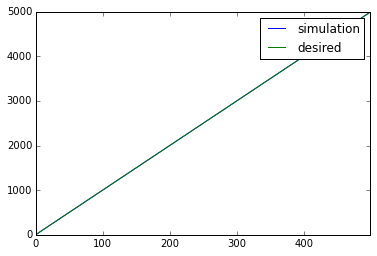

In [34]:
plt.plot(x[0,:].T)
plt.plot(yow.T)
plt.xlim([0,SIM_LENGTH-2])
plt.legend(['simulation', 'desired'])

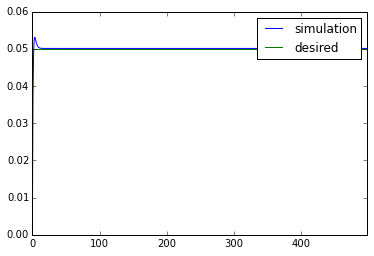

In [35]:
plt.plot(x[1,:].T)
plt.plot(vd)
plt.xlim([0,SIM_LENGTH-2])
plt.legend(['simulation', 'desired'])

Now implement the controller in the Launchpad. The sketch <b>`closed_loop.ino`</b> contains some code that implements the closed loop control. 

First go to the code block labeled **`CODE BLOCK A3`**. Add the controller gains `F1` and `F2` for each wheel.

Next, go to the code block labeled **`CODE BLOCK C`**. Here, you need to fill in the new $u[k]$ values for each wheel. The functions `input_left` and `input_right` updates the left and right wheel controllers. When filling in the arguments to these function calls, the variables you might care are:
- `F1_left`
- `F2_left`
- `F1_right`
- `F2_right`
- `left_position` & `right_position`
- `left_target_speed` & `right_target_speed`
- `left_current_speed` & `right_current_speed`

Upload the sketch to your Launchpad. If you open Serial Monitor in Energia, the Launchpad prints out the current $u[k]$, speed and position for both wheels. Your car wheels are going to move in this step too; make sure that the car is suspended above the desk.
 
<b>Check that the wheels are moving as you expect them to. If you use your hand to put some friction on the wheels, does the feedback correct for it?</b>

Once you are satisfied that your motors work and your closed loop is implemented, put the car on the ground. Click the reset button, SIXT33N should go in a straight line. Does it behave how you expect? If it behaves erroneously (for example the controller oscillates), go back to the simulation and try different eigenvalues. This is an artifact of using a linear model as an approximation of the system and can be solved by experimenting with the controller gain.

<span style='color:red'>**What are some reasons why the simulation might behave differently from the car? What about the differences between when the car is on the ground versus when it is on the desk?**</span>

<a id='part5'></a>
## <span style="color:blue">Part 5: Implementing Turns</span>

### Materials
- Part 4 setup

Now go back to the closed loop control and think of a way to implement a turn given the system that you already have. Note that a 'turn' is as simple or as complicated as you make it. Having SIXT33N literally turn 90 degrees in place suffices. Also note that your wheels can only go forward, so setting a negative velocity or position would not work. This should be a simple addition to your model$-$ think about the easiest signals you can manipulate to get the car to turn (Hint: the inputs to the system). Draw out your new block diagram.

<span style='color:red'>**Show your GSI the new block diagram.**</span>

Once your GSI agrees, implement the turning on the Launchpad. Firstly, open the sketch `turning.ino` and copy the **`CODE BLOCK A3`** and **`CODE BLOCK C`** from `closed_loop.ino`. 

On top of the closed loop code, this sketch implements some turning logic in **`CODE BLOCK D`**. SIXT33N should go straight for 3 seconds, stop, turn left for 3 seconds, stop, go straight for 3 seconds, turn right for 3 seconds, stop, and repeat. Right now the code only drives straight. 

Your task is to modify the second and fourth `if` statements to do what the comment says. The given function `wheel_drive()` takes 2 arguments and sets the desired wheel speeds. The first argument is the left desired wheel speed while the second is the right desired wheel speed. You are welcome to modify these function calls. 

On top of these, you can also add new variable(s) in **`CODE BLOCK A3`** and use it in **`CODE BLOCK C`** and **`CODE BLOCK D`**. You might need these variable(s) to implement the turning.

There's one last parameter that you need to modify. Near the top of the sketch, there is a definition for the constant **`INITIAL_PWM`**. This is the initial PWM level (between 0 and 255) that the wheels start at when it starts to drive. When you run the car, if it does not start moving and make some noise instead, increase this constant. If the car immediately moves too fast and you would like to slow it down when it just starts driving, decrease this constant. You would need to also save this number for later sketches.

When you're done, try it out! It's ok if SIXT33N does not turn 90 degrees - as long as it turns you should be fine.

<span style='color:red'>**Show your GSI the controlled SIXT33N!**</span>

In the next phase, you will integrate all of the parts and use the results of the PCA to control SIXT33N through the microphone.

<img width='30px' align='left' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/check.png">
<br/>
## <span style="color:green">CHECKPOINT 2</span>
 <span style="color:green">**Show your GSI the SIXT33N driving straight and turning.**</span>